# Jonathan Halverson
# Friday, April 15, 2016
# Linear discriminant analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

LDA like PCA is a feature extraction technique that can be used to increase computational efficiency and reduce overfitting. Unlike PCA, LDA is supervised meaning it works with the class labels. While PCA find the orthogonal axes that maximize the variance and projects the data onto this subspace, LDA aims to find the feature subspace that optimizes class separability.

LDA assumes:

1. The data is normally distributed
2. The classes have identical covariance matrices
3. The features are independent of each other

The main steps to LDA are:

1. Standard the data (n samples, d features)
2. Compute the mean vector for each class (size d)
3. Compute the between-class scatter matrix and the in-class scatter matrix
4. Compute the eigenvectors and eigenvalues of $S_w^{-1}S_b$
5. Form a transformation matrix from the eigenvectors with the largest eigenvalues
6. Project the samples onto the new feature subspace

In [2]:
columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', \
           'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.csv', names=columns)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.iloc[:,1:].values
y = df['class'].values

In [4]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

In [5]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
X_std_lda = lda.fit_transform(X_std, y)

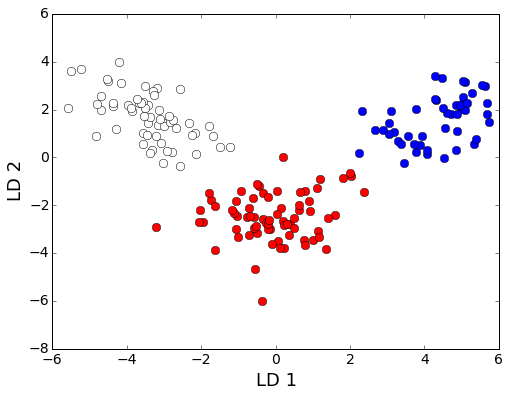

In [10]:
plt.plot(X_std_lda[y==1, 0], X_std_lda[y==1, 1], 'wo')
plt.plot(X_std_lda[y==2, 0], X_std_lda[y==2, 1], 'ro')
plt.plot(X_std_lda[y==3, 0], X_std_lda[y==3, 1], 'bo')
plt.xlabel('LD 1')
plt.ylabel('LD 2')

In the figure above it is clear that the classes are linearly separable.